<h1><center>Customer Data Exploration</center></h1>

## 1. Load Data

### 1.1 Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, confusion_matrix, classification_report

sns.set(style='ticks',palette='pastel',font_scale=1.3)

### 1.2 Data

<b>Data Dictionary</b>
<ul>
    <li>"index": the unique ID to identify each row starting with 0</li>
    <li>"response": 1 for question not answered and 0 for question answered</li>
    <li>"IL1": CSA (customer service agent) identified issue level 1</li>
    <li>"IL2": CSA identified issue level 2</li>
    <li>"IL3": CSA identified issue level 3</li>
    <li>"IL4": CSA identified issue level 4</li>
<li>"CIL1": customer identified issue level 1</li>
<li>"CIL2": customer identified issue level 2</li>
<li>"CIL3": customer identified issue level 3</li>
<li>"CLI4": customer identified issue level 4</li>
<li>"prime": 1 for prime customer, 0 for not prime customer</li>
<li>"score1": a score related to customer's technical savviness level (higher is more savvy)</li>
<li>"score2": a score related to likelihood of repeat contact (higher is more likely)</li>
<li>"score3": a score related to likelihood of repeat contact (higher is more likely)</li>
<li>"score4": a score related to likelihood of repeat contact (higher is more likely)</li>
<li>"score5": a score related to likelihood of repeat contact (higher is more likely)</li>
<li>"contact_type": a variable related to masked contact type</li>
<li>"day": day of the week with Monday=0 and Sunday=6</li>
<li>"hour": hour of the day in 24 hour format</li>
<li>"device": a masked device code name Metrics</li>
</ul>

In [2]:
df_train = pd.read_csv('Training.csv', na_values='null')
df_train.head()

,ID,response,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
0,4569,1,Account Assistance / Mycd Settings,Payment Assistance,1-Click Setup,C. Education - Instructions Provided,NaN,NaN,NaN,NaN,0,0.05,NaN,NaN,NaN,NaN,NaN,3,8,D-51
1,4402,0,Freetime,Freetime Unlimited / Subscription,Refund,NaN,NaN,NaN,NaN,NaN,0,0.10,NaN,NaN,NaN,NaN,NaN,3,4,D-37
2,9533,0,Content,Content Quality,Corrupt - Won'T Open,Updated Content,NaN,NaN,NaN,NaN,1,2.00,NaN,NaN,NaN,NaN,NaN,0,15,D-24
3,9981,0,Kindle Tablet,Alexa On Tablet,Basic Info / How-To,C. Education - General Info,NaN,NaN,NaN,NaN,0,0.00,NaN,NaN,NaN,NaN,NaN,1,8,D-16
4,1849,0,Content,Book Syncing & Download Issues,Stuck In To Do Queue,Hard Restart - Fixed Issue,NaN,NaN,NaN,NaN,0,1.25,NaN,NaN,NaN,NaN,NaN,5,7,D-6


In [3]:
print(df_train.info())
df_train.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6815 entries, 0 to 6814
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6815 non-null   int64  
 1   response      6815 non-null   int64  
 2   IL1           6810 non-null   object 
 3   IL2           6728 non-null   object 
 4   IL3           6706 non-null   object 
 5   IL4           6289 non-null   object 
 6   CIL1          1670 non-null   object 
 7   CIL2          1646 non-null   object 
 8   CIL3          1506 non-null   object 
 9   CLI4          323 non-null    object 
 10  prime         6815 non-null   int64  
 11  score1        5946 non-null   float64
 12  score2        2566 non-null   float64
 13  score3        2566 non-null   float64
 14  score4        2566 non-null   float64
 15  score5        2566 non-null   float64
 16  contact_type  2566 non-null   float64
 17  day           6815 non-null   int64  
 18  hour          6815 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,6815,NaN,NaN,NaN,6907.2,4016.89,1,3423.5,6891,10372.5,13911
response,6815,NaN,NaN,NaN,0.0856933,0.279931,0,0,0,0,1
IL1,6810,50,Content,2534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL2,6728,192,Basic Info / How-To,692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL3,6706,490,Accidental Order,607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL4,6289,511,Refunded,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL1,1670,14,Amazon Devices And Kindle Apps,555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL2,1646,53,Amazon Devices,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL3,1506,121,Something else,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLI4,323,32,Something else,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for col in df_train.columns:
    print('Column {} has {} null values'.format(col, df_train[col].isnull().sum()))

Column ID has 0 null values
Column response has 0 null values
Column IL1 has 5 null values
Column IL2 has 87 null values
Column IL3 has 109 null values
Column IL4 has 526 null values
Column CIL1 has 5145 null values
Column CIL2 has 5169 null values
Column CIL3 has 5309 null values
Column CLI4 has 6492 null values
Column prime has 0 null values
Column score1 has 869 null values
Column score2 has 4249 null values
Column score3 has 4249 null values
Column score4 has 4249 null values
Column score5 has 4249 null values
Column contact_type has 4249 null values
Column day has 0 null values
Column hour has 0 null values
Column device has 0 null values


## Q1
<ul>
    <li>Numerical:
        <ol>
            <li>score1, score2, score3, score4, score5</li>
        </ol>
    </li>
    <li>Categorical:
        <ol>
            <li>Response (only represented using numbers)</li>
            <li>IL1, IL2, IL3, IL4</li>
            <li>CIL1, CIL2, CIL3, CIL4</li>
            <li>prime</li>
            <li>contact_type</li>
            <li>device</li>
        </ol>
    </li>
</ul>
No Missing Data:
<ol>
    <li>ID</li>
    <li>Response</li>
    <li>prime</li>
    <li>day</li>
    <li>hour</li>
    <li>device</li>
</ol>

Only the auto-filled columns are all not-null

In [5]:
num_cols = ['score'+str(i) for i in range(1, 6)] + ['day', 'hour']
cat_cols_part = ['response', 'prime', 'contact_type']
cat_cols = ['device'] + cat_cols_part + ['IL'+str(i) for i in range(1, 5)] + ['CIL'+str(i) for i in range(1, 3)] + ['CLI4']

''

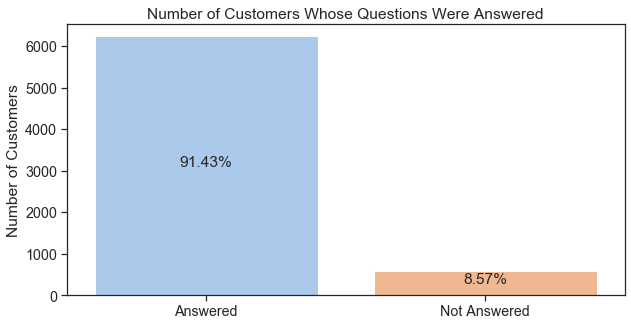

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig = sns.countplot(x='response', data=df_train)
ax.set(title='Number of Customers Whose Questions Were Answered',
        xlabel='', ylabel='Number of Customers',
        xticklabels=['Answered','Not Answered'])
for f in fig.patches:
    h = f.get_height()
    l = h / df_train.shape[0]
    fig.text(f.get_x() + f.get_width()/2, h * 0.5, str(round(l*100,2))+'%' ,ha="center")
;

Checking response distribution is key - if the distribution is extremely unbalanced, consider using different metrics or expanding dataset.

### 1.3 Data Exploration

## Q2

#### Numerical columns

''

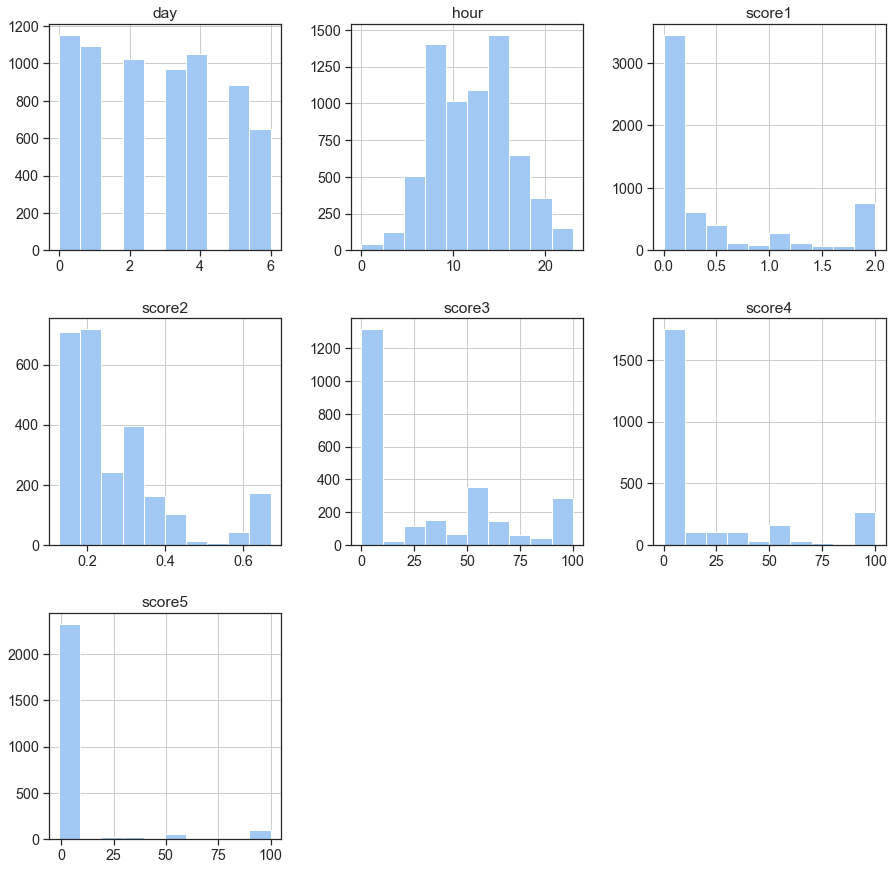

In [7]:
df_train.hist(column=num_cols, figsize=(15,15))
;

<b>Observations:</b><br>
Most questions are asked in the middle of the day.<br>
Most customers who ask questions are not tech savvy.<br>

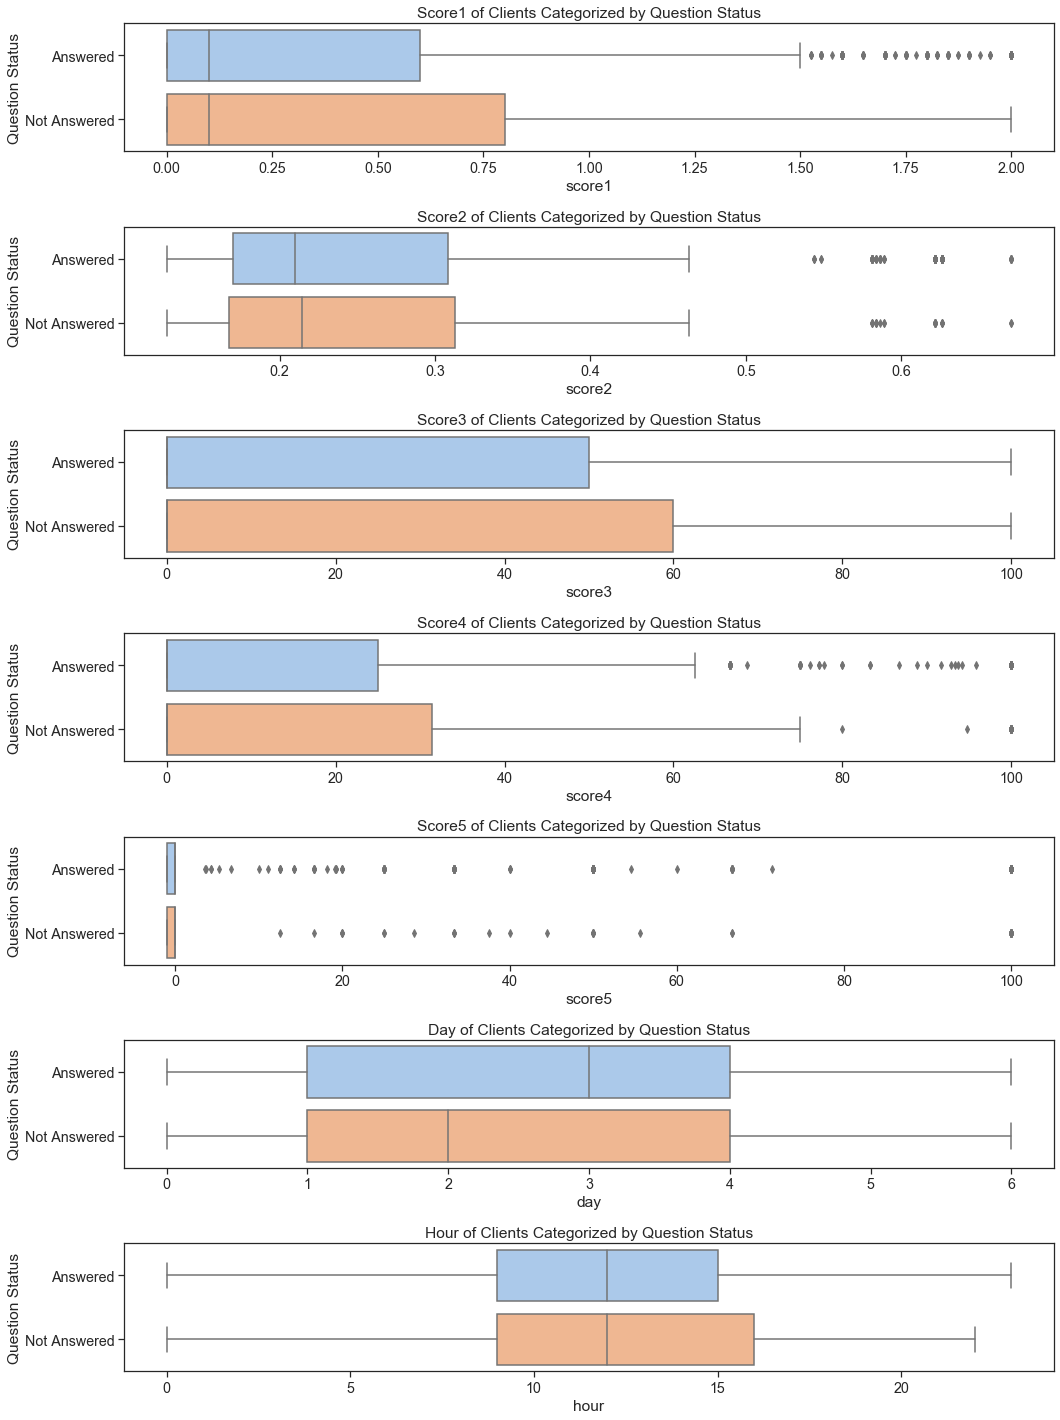

In [8]:
fig, axs = plt.subplots(nrows=len(num_cols),figsize=(15,20))
for i, col in enumerate(num_cols):
    f = sns.boxplot(x=col, y='response',data=df_train,ax=axs[i], orient='h')
    f.set(xlabel=col,ylabel='Question Status',title=col.capitalize()+' of Clients Categorized by Question Status')
    f.set_yticklabels(['Answered','Not Answered'])
fig.tight_layout()

For score 2, 3, 4, 5, the customers whose questions are not answered have a much higher score, which indicates that these customers have higher likelihood of repeated contact.<br>
For score 1, the customers whose questions are not answered have a much higher score, which means they are more tech savvy.

#### Categorical columns

In [9]:
for cat_col in cat_cols:
    print('Column {} has {} unique values:'.format(cat_col, str(df_train[cat_col].nunique())))
    print(', '.join([str(i) for i in df_train[cat_col].unique().tolist()]))
    print()

Column device has 68 unique values:
D-51, D-37, D-24, D-16, D-6, D-53, D-62, D-38, D-27, D-70, D-29, D-46, D-10, D-45, D-25, D-31, D-50, D-28, D-11, D-17, D-14, D-8, D-32, D-22, D-49, D-34, D-57, D-52, D-65, D-56, D-44, D-9, D-1, D-64, D-55, D-20, D-5, D-4, D-67, D-42, D-7, D-43, D-48, D-40, D-41, D-15, D-39, D-0, D-23, D-54, D-3, D-63, D-68, D-19, D-33, D-35, D-47, D-59, D-58, D-36, D-26, D-61, D-69, D-21, D-60, D-2, D-30, D-18

Column response has 2 unique values:
1, 0

Column prime has 2 unique values:
0, 1

Column contact_type has 2 unique values:
nan, 0.0, 4.0

Column IL1 has 50 unique values:
Account Assistance / Mycd Settings, Freetime, Content, Kindle Tablet, Reading App, Kindle Store, Fire Tv / Stick, Kindle Tablet Apps, Amazon Instant Video, Wms / Order Support / Edge-Cases, Replaced Device, 3rd Party Tv / Video, Account Assistance, Apps / Games, Kindle E-Ink, Follow-Up Notification, Non-Order Related, Fire Tv / Stick Pre Purchase Info, Accessory, Fire Tv Remote, Feedback, Ki

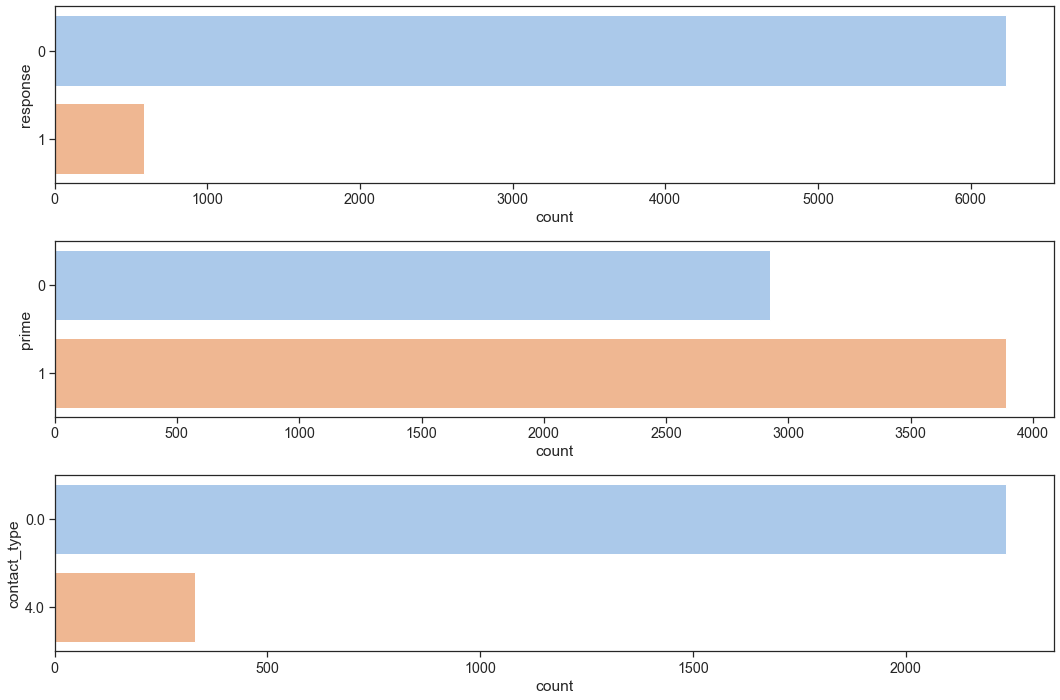

In [10]:
fig, axs = plt.subplots(nrows=len(cat_cols_part),figsize=(15,10))
for i, col in enumerate(cat_cols_part):
    f = sns.countplot(y=col, data=df_train, ax=axs[i], orient='h')
fig.tight_layout()

Most customers' questions were answered.<br>
There are a lot more prime customers.<br>

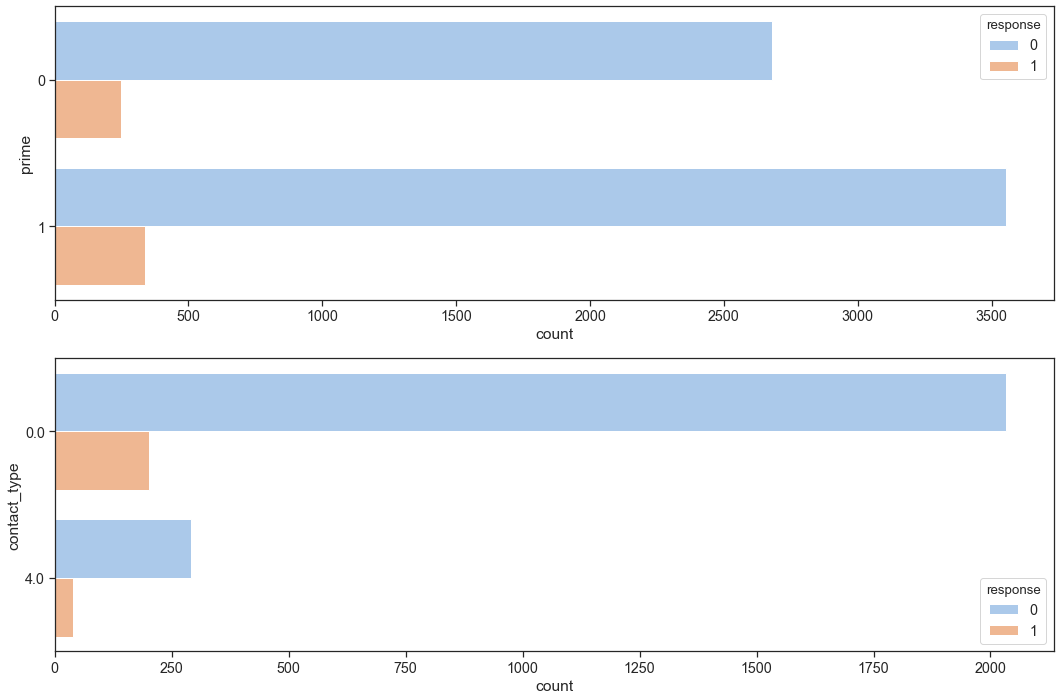

In [11]:
fig, axs = plt.subplots(nrows=len(cat_cols_part)-1,figsize=(15,10))
for i, col in enumerate([col for col in cat_cols_part if col!='response']):
    f = sns.countplot(y=col, hue='response', data=df_train, ax=axs[i], orient='h')
fig.tight_layout()

## Q3

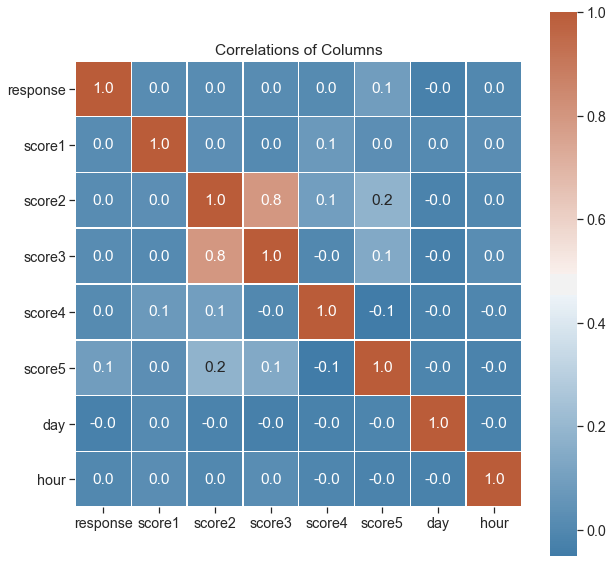

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(600, 24, as_cmap=True)

fig = sns.heatmap(df_train[['response'] + num_cols].corr(), annot=True, fmt='.1f', cmap=cmap, square=True, linewidths=0.5)
fig.set(title='Correlations of Columns')
plt.show()

Score2 and score3 have a high correlation. Since they both measure the likelihood of the customer to repeat contact, it makes sense that these columns are related.

''

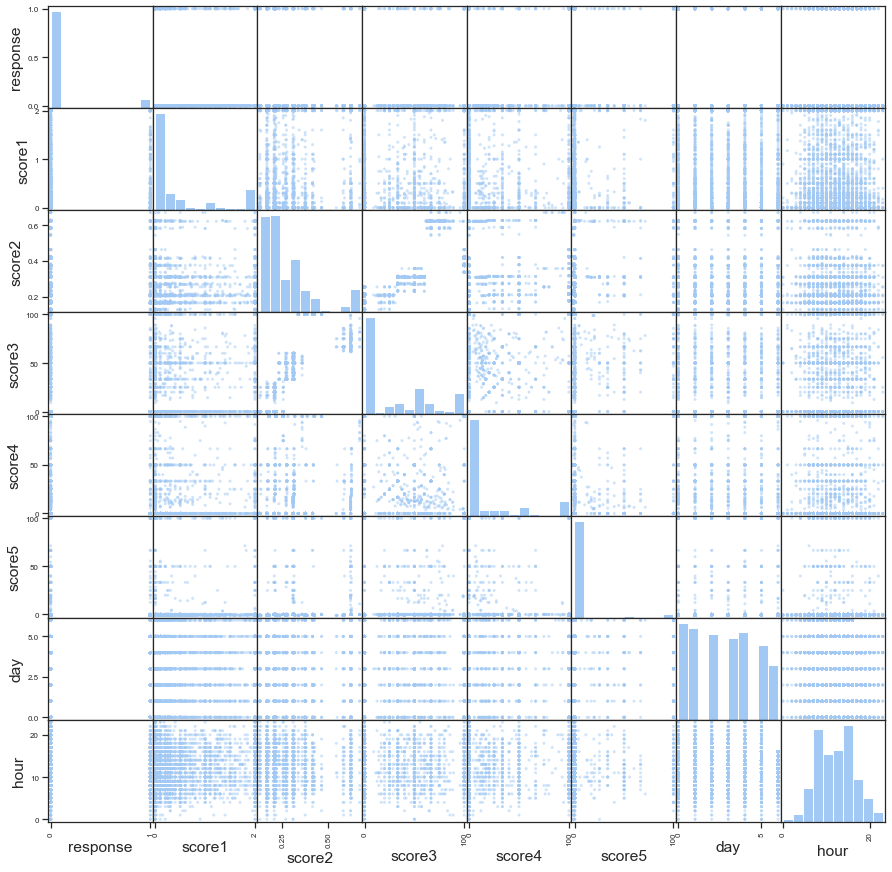

In [497]:
pd.plotting.scatter_matrix(df_train[['response']+num_cols], alpha=0.5, figsize=(15, 15))
;

The scatter atrix confirms score 2's correlation with score 3.

Not all models are affected by correlated matrix.<br>
The ones that will be impacted the most are regressions, e.g. linear regression.<br>
Say col1 = k * col2. Then if y = 2col1, y = 3col1 - col2, etc. The coefficients for the related columns are not constant and may greatly impact the accuracy o the regression. This is called multicollinearity.

It is also important to check the correlation between response and other features.<br>
If response (the dependent variable) has a high correlation with one feature:<br>
<ol>
    <li>There is a simple and straight-forward relationship (possibly causation) between feature and dependent variable</li>
    <li>There is information "leakage" - the model is possibly using some data that should be unknown at the time of making the prediction. e.g. using past year's sales data in the week after christmas to predict sales data during christmas</li>
</ol>

## Q4

In [36]:
df_train['response'].value_counts()

0    6231
1     584
Name: response, dtype: int64

In [37]:
584/df_train.shape[0]

0.08569332355099046

F1 is a suitable metric because:<br><br>
<b>Business problem:</b>Predict whether the customer's question is answered.<br>
If answered = 0 = negative, not answered = 1 = positive,<br>
The true positive (questions are actually not answered and predicted not answered) and false negative (questions are actually not answered and predicted answered) results are the important ones. On the other hand, true negatives (questions are actually answered and predicted answered) are not important.<br>
Therefore, instead of using accuracy which emphasizes true positives and true negatives, it is better to use F1 score which emphasizes false negatives and false positives.<br><br>
<b>Imbalanced data:</b> questions of only 8% of customers are unanswered. There are way more negatives than positives. Therefore, if using accuracy as the metric, the model could do well even if it predicts negatives for all customers. Using F1 score would emphasize false negatives and false positives, so it is a btter measure of the model's performance.

In actual work, the metric might be a weighted accuracy and is heavily dependent on business goal and the cost of false negatives and positives.

## Q5

In [124]:
no_null_cols = [col for col in df_train.columns if df_train[col].isnull().sum()==0]
no_null_cols

['ID', 'response', 'prime', 'day', 'hour', 'device']

In [40]:
cols = ['prime', 'day', 'hour']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df_train[cols],
                                                    df_train['response'],
                                                    test_size=0.3, random_state=0)

In [485]:
params = {
#           'criterion':['gini','entropy'],
          'class_weight':['balanced', {0:1, 1:3}, {0:1, 1:5}],
          'max_features':list(range(1,4)),
          'max_depth':list(range(3,11)),
          'min_samples_leaf':list(range(1,11)),
          'min_samples_split':list(range(1,11))
         }

rand_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=0, criterion='gini'),
    param_distributions=params,
    cv = 10,
    random_state=0,
    scoring='f1',
    n_jobs = -1
)

rand_result = rand_search.fit(X_train, y_train)

In [486]:
rand_result.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 6,
 'max_features': 2,
 'max_depth': 8,
 'class_weight': 'balanced'}

In [498]:
dtc = DecisionTreeClassifier(criterion='gini',
                             class_weight='balanced',
                             random_state=0,
                             min_samples_split=5,
                             min_samples_leaf=2,
                             max_features=2,
                             max_depth=7)

In [499]:
dtc = dtc.fit(X_train, y_train)

In [500]:
for col, i in zip(X_train.columns, dtc.feature_importances_):
    print('Column {} has importance {}'.format(col, str(i)))

Column prime has importance 0.06252370888331994
Column day has importance 0.2540869036908524
Column hour has importance 0.6833893874258277


The hour column has the most importance in this model.

In [501]:
y_predict = dtc.predict(X_test)

In [502]:
f1_score(y_test, y_predict)

0.15158546017014696

In [503]:
print('The precision of decision tree is',round(dtc.score(X_test,y_test),3))
print(classification_report(y_test,y_predict))

The precision of decision tree is 0.464
              precision    recall  f1-score   support

           0       0.92      0.45      0.61      1870
           1       0.09      0.56      0.15       175

    accuracy                           0.46      2045
   macro avg       0.50      0.51      0.38      2045
weighted avg       0.85      0.46      0.57      2045



In [504]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
pd.DataFrame({'Not Answered':[tp, fp], 'Answered':[fn, tn]}, index=['Not Answered', 'Answered'])

,Not Answered,Answered
Not Answered,98,77
Answered,1020,850


In [494]:
cv_scores = cross_val_score(dtc, df_train[cols], df_train['response'], cv=10)
print('Mean score is {}'.format(np.mean(cv_scores)))
print('Score STD is {}'.format(np.std(cv_scores)))

Mean score is 0.5052060321848584
Score STD is 0.08551355268283907


In [3]:
df_test = pd.read_csv('Test.csv')
df_test.head()

,ID,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
0,3359,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,NaN,NaN,NaN,NaN,1,0.0,NaN,NaN,NaN,NaN,NaN,6,15,D-27
1,13318,3rd Party Music,Pandora,Issues,Instructions Sent / Asked Customer To Call,Carnac Suggested,Amazon Devices,Fire TV,NaN,1,0.0,0.167584,25.0,0.0,100.0,4.0,6,11,D-70
2,5956,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,NaN,NaN,NaN,NaN,1,1.5,NaN,NaN,NaN,NaN,NaN,3,8,D-45
3,11408,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,6,7,D-70
4,11577,3rd Party Tv / Video,Hulu,On Device Subscription Offer,C. Education - General Info,NaN,NaN,NaN,NaN,0,0.1,NaN,NaN,NaN,NaN,NaN,3,9,D-27
